
## La bibliothèque `numpy` de Python

`numpy` est une extension du langage Python qui permet de manipuler des tableaux multi-dimensionnels et/ou des matrices.  
Elle est souvent utilisée conjointement à l'extension `scipy` qui contient des outils relatifs:

- aux intégrateurs numériques (`scipy.integrate`);
- à l'algèbre linéaire (`scipy.linalg`);
- etc.

Des fonctionnalités simples illustrant le fonctionnement de `numpy` sont présentées ci-dessous.  
En cas de souci, n'hésitez pas à vous référer à:

- la documentation de `numpy` [ici](https://docs.scipy.org/doc/numpy/reference/);
- la documentation de `scipy` [ici](https://docs.scipy.org/doc/scipy/reference/) pour ce que vous ne trouvez pas dans `numpy`.

In [2]:
import numpy as np

### Types des données embarquées

On peut créer un tableau `numpy` à partir d'une structure itérable (tableau, tuple, liste) Python.  
La puissance de `numpy` vient du fait que tous les éléments du tableau sont forcés au même type (le moins disant).

In [3]:
# Définition d'un tableau à partir d'une liste
tableau = [2, 7.3, 4]
print('>>> Liste Python: type %s' % type(tableau))
for l in tableau:
    print('{%s, %s}' % (l, type(l)), end=" ")
print()
print()

# Création d'un tableau numpy
tableau = np.array(tableau)
print('>>> Tableau numpy: type %s' % type(tableau))
for l in tableau:
    print('{%s, %s}' % (l, type(l)), end=" ")
print()

print('On retrouve alors le type de chaque élément dans dtype: %s' % tableau.dtype)

>>> Liste Python: type <class 'list'>
{2, <class 'int'>} {7.3, <class 'float'>} {4, <class 'int'>} 

>>> Tableau numpy: type <class 'numpy.ndarray'>
{2.0, <class 'numpy.float64'>} {7.3, <class 'numpy.float64'>} {4.0, <class 'numpy.float64'>} 
On retrouve alors le type de chaque élément dans dtype: float64


### Performance

On reproche souvent à Python d'être lent à l'exécution. C'est dû à de nombreux paramètres, notamment la flexibilité du langage, les nombreuses vérifications faites à notre insu (Python ne présume de rien sur vos données), et surtout au **typage dynamique**.  
Avec `numpy`, on connaît désormais une fois pour toute le type de chaque élément du tableau; de plus les opérations mathématiques sur ces tableaux sont alors codées en C (rapide!)

Observez plutôt:

In [6]:
tableau = [i for i in range(1, 10000000)]
array = np.array(tableau)

In [5]:
%timeit double = [x * 2 for x in tableau]

735 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit double = array * 2

19.2 ms ± 83 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Vues sur des sous-ensembles du tableau

Il est possible avec `numpy` de travailler sur des vues d'un tableau à $n$ dimensions qu'on aura construit.  
On emploie ici le mot **vue** parce qu'une modification des données dans la vue modifie les données dans le tableau d'origine.

Observons plutôt:

In [8]:
tableau = np.array([[i+2*j for i in range(5)] for j in range(4)])
print(tableau)

[[ 0  1  2  3  4]
 [ 2  3  4  5  6]
 [ 4  5  6  7  8]
 [ 6  7  8  9 10]]


In [9]:
# On affiche les lignes d'indices 0 à 1 (< 2), colonnes d'indices 2 à 3 (< 4)
sub = tableau[0:2, 2:4]
print(sub)

[[2 3]
 [4 5]]


In [10]:
# L'absence d'indice signifie "début" ou "fin"
sub = tableau[:3, 2:]
print(sub)

[[2 3 4]
 [4 5 6]
 [6 7 8]]


In [11]:
# On modifie sub
sub *= 0
print(sub)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


<div class="alert alert-danger">
<b>Attention</b>: voici pourquoi on parlait de vue !
</div>

In [12]:
print(tableau)

[[ 0  1  0  0  0]
 [ 2  3  0  0  0]
 [ 4  5  0  0  0]
 [ 6  7  8  9 10]]


### Opérations matricielles

`numpy` donne accès aux opérations matricielles de base.

In [13]:
a = np.array([[4,6,7,6]])
b = np.array([[i+j for i in range(5)] for j in range(4)])

print(a.shape, a, sep="\n")
print()
print(b.shape, b, sep="\n")

(1, 4)
[[4 6 7 6]]

(4, 5)
[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]]


In [14]:
# Produit matriciel (ou vectoriel)
print(np.dot (a, b))

[[ 38  61  84 107 130]]


<div class="alert alert-danger">
<b>Attention</b>: Contrairement à Matlab, les opérateurs arithmétiques +, -, * sont des opérations terme à terme.
</div>

Pour bien comprendre la différence:

In [15]:
import numpy.linalg

a = np.array([[abs(i-j) for i in range(5)] for j in range(5)])
inv_a = numpy.linalg.inv(a) # L'inverse
print(a)
print(inv_a)

[[0 1 2 3 4]
 [1 0 1 2 3]
 [2 1 0 1 2]
 [3 2 1 0 1]
 [4 3 2 1 0]]
[[-0.375  0.5    0.     0.     0.125]
 [ 0.5   -1.     0.5    0.     0.   ]
 [ 0.     0.5   -1.     0.5    0.   ]
 [ 0.     0.     0.5   -1.     0.5  ]
 [ 0.125  0.     0.     0.5   -0.375]]


In [16]:
print(inv_a * a)
print("\nDiantre!!")

[[-0.   0.5  0.   0.   0.5]
 [ 0.5 -0.   0.5  0.   0. ]
 [ 0.   0.5 -0.   0.5  0. ]
 [ 0.   0.   0.5 -0.   0.5]
 [ 0.5  0.   0.   0.5 -0. ]]

Diantre!!


In [17]:
print(np.dot(inv_a, a))
print("\nC'est si facile de se faire avoir...")

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

C'est si facile de se faire avoir...


<div class="alert alert-success">
<b>Note</b>: Depuis Python 3.5, l'opérateur @ est utilisable pour la multiplication de matrice.
</div>

In [18]:
print(inv_a @ a)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# La bibliothèque `matplotlib` de Python

`matplotlib` propose un ensemble de commandes qui permettent d'afficher des données de manière graphique, d'afficher des lignes, de remplir des zones avec des couleurs, d'ajouter du texte, etc.

L'instruction `%matplotlib inline` avant l'import permet de rediriger la sortie graphique vers le notebook.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

L'instruction `plot` prend une série de points en abscisses et une série de points en ordonnées:

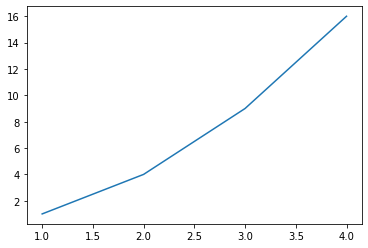

In [20]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

Il y a un style par défaut qui est choisi de manière automatique, mais il est possible de sélectionner:
    
- les couleurs;
- le style des points de données;
- la longueur des axes;
- etc.

Text(0, 0.5, 'Argent')

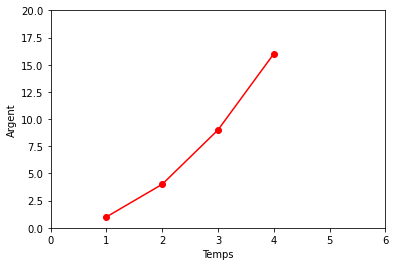

In [21]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro-')
plt.xlim(0, 6)
plt.ylim(0, 20)
plt.xlabel("Temps")
plt.ylabel("Argent")

Il est recommandé d'utiliser `matplotlib` avec des tableaux `numpy`.

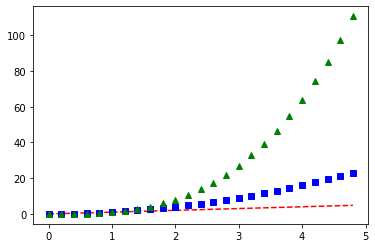

In [27]:
# échantillon à 200ms d'intervalle
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

Enfin il est possible d'afficher plusieurs graphes côte à côte.  
Notez que l'on peut également gérer la taille de la figure (bitmap) produite.

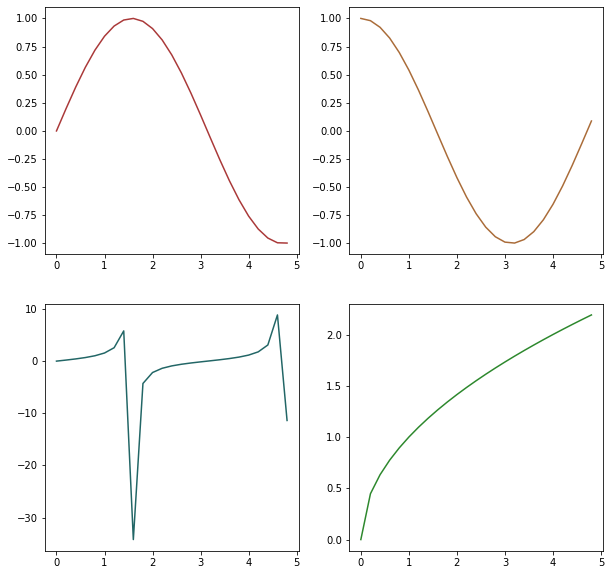

In [28]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

# Vous pouvez choisir des palettes de couleurs « jolies » avec des sites comme celui-ci :
# http://paletton.com/#uid=7000u0kllllaFw0g0qFqFg0w0aF

ax[0,0].plot(t, np.sin(t), '#aa3939')
ax[0,1].plot(t, np.cos(t), '#aa6c39')
ax[1,0].plot(t, np.tan(t), '#226666')
ax[1,1].plot(t, np.sqrt(t), '#2d882d')

Un bon réflexe semble être de commencer tous les plots par:

```python
fig, ax = plt.subplots()
```


<div class="alert alert-warning">
<b>Exercice:</b> Tracer le graphe de la fonction $t \mapsto e^{-t} \cdot \cos(2\,\pi\,t)$ pour $t\in[0,5]$
</div>

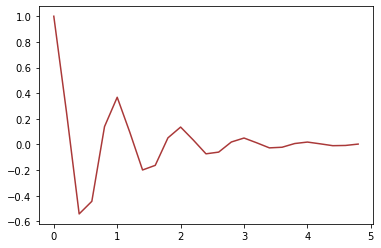

In [32]:
fig, ax = plt.subplots()
ax.plot(t, np.exp(-t)*np.cos(2*np.pi*t), '#aa3939')

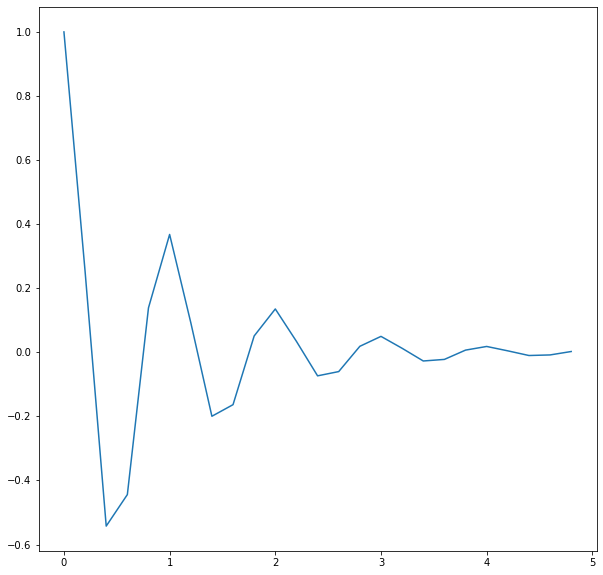

In [34]:
# %load solutions/trace_cos.py
fig, ax = plt.subplots(figsize=(10,10))
t = np.arange(0., 5., .2)
ax.plot(t, np.exp(-t)*np.cos(2*np.pi*t))

<div class="alert alert-warning">
<b>Exercice:</b> À partir des coordonnées polaires, produire les coordonnées $(x,y)$ pour la fonction $r=\sin(5\,\theta)$, puis les tracer.
</div>

<b>Consigne</b> : n'utiliser que des tableaux et des fonctions `numpy` pour produire les données à tracer.

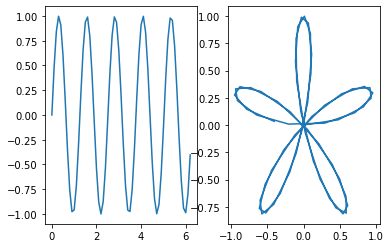

In [45]:
teta = np.arange(0.0, 2*np.pi, 0.1)
r = np.sin(5*teta)

x = r*np.cos(teta)
y = r*np.sin(teta)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(teta, r)
ax2.plot(x, y)

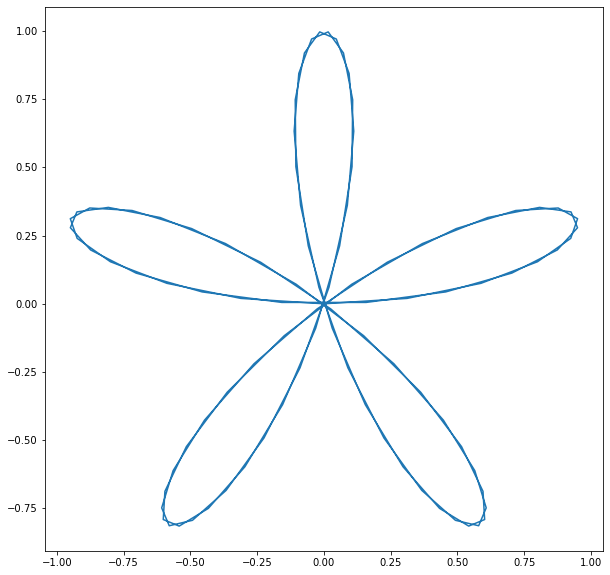

In [44]:
# %load solutions/trace_sin.py
theta = np.linspace(0.0, 2*np.pi, 100)
r = np.sin(5 * theta)
x, y = r * np.cos(theta), r * np.sin(theta)
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(x, y)